In [1]:
import clean_data
from lifelines import KaplanMeierFitter

In [2]:
df = clean_data.create_df_from_mongo()

import data from mongoDB to pandas dataframe


In [66]:
sample_df = df.loc[:100, :]

In [56]:
max_value = 1526169600 - 1514764800

The purpose of this notebook is to use the Lifelines module to do some user segmentation on the chess.com dataset

Things I need to do:
1. Get the first and last games played by each player (determine duration of users time on site)
2. what period of time of inactivity will I consider death (2 weeks without a game?)
3. make some graphs
4. segment population


loop through all games by an individual
    if the diff in time between the next game or current time is greater than two weeks:
        take the last time as the 'death' event
'birth' event = sign up date (maybe first game?)
duration of user 'life' = death time - birth time

In [3]:
def game_end_time(df, player, month, game):
    '''returns type of time control if the game was played within the first 30 days'''
    return df['games'][player][month][0]['games'][game]['end_time']

def user_lifetimes(df):
    end_time = 1526169600
    player_idxes = range(df.shape[0])
    all_times = []
    for player in player_idxes:
        time_of_games = []
        for month in range(5):
            try:
                for game in range(clean_data.games_in_a_month(df, player, month)):
                    time_of_games.append(game_end_time(df, player, month, game))
            except (KeyError, IndexError):
                continue
        if time_of_games:
            birth = time_of_games[0]
            death = duration(time_of_games)
            if not death:
                still_alive = time_of_games[-1] - birth
                all_times.append((still_alive, player, False))
            else:
                all_times.append(((death - birth), player, True))
        else:
            all_times.append((0, player, True))
    return all_times

def duration(time_of_games):
    seconds_in_two_weeks = 604800
    for i, x in enumerate(time_of_games):
        if x - time_of_games[i - 1] > seconds_in_two_weeks:
            return time_of_games[i - 1]

In [4]:
user_times = user_lifetimes(df)

In [36]:
def fake_death_time(time_of_games):
    seconds_in_two_weeks = 50
    times = duration(time_of_games)
    if times:
        return times[0]
    else:
        return time_of_games[-1] - time_of_games[0]
        
nums = [[2, 5, 10, 16, 24], [0, 2, 7, 8, 15, 100], [23, 25, 100, 102, 103], [], [1, 10000, 200000], [1516154262, 1516318955, 1516320601, 1516320864, 1516321154, 1516321416, 1516322103, 1516322534, 1516322614, 1516323629, 1522709922, 1522722105, 1522794278, 1522886378, 1523065535, 1523066047, 1523143799, 1523144383, 1523207447, 1523727492, 1523728070, 1523821548, 1523821610, 1523821718, 1523822394, 1524323057, 1524323888, 1524324698, 1524341290, 1524342351, 1524343346, 1524959707, 1524960033, 1525819501, 1525820389]]
for num in nums:
    if num:
#         print(death_time(num))
        print(duration(num))
    else:
        print(0)

None
15
25
0
1
1516154262


In [95]:
def duration(time_of_games):
    seconds_in_two_weeks = 604800
    for i, x in enumerate(time_of_games):
        if x - time_of_games[i - 1] > seconds_in_two_weeks:
            return time_of_games[i - 1]

In [35]:
all_times[player]

not_empty


In [5]:
for duration_, player, death_observed in user_lifetimes(df):
    df.loc[player, 'duration_days'] = duration_ / 3600
    df.loc[player, 'death_observed'] = death_observed

In [6]:
df[['player_id', 'duration_days', 'death_observed']]

,player_id,duration_days,death_observed
0,42361082,47.046389,True
1,42121838,2963.329722,False
2,42324950,0.000000,True
3,42192576,103.023333,True
4,42332948,70.347500,True
5,42762076,2559.382500,False
6,42165872,2998.106944,False
7,42530248,1556.334444,False
8,42824544,164.398611,True
9,42425796,339.065278,True


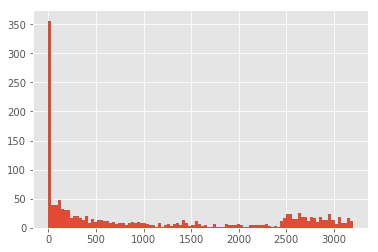

In [16]:
df['duration_days'].hist(bins=100)

In [9]:
kmf = KaplanMeierFitter()

T = df['duration_days']
E = df['death_observed']

kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter: fitted with 1453 observations, 456 censored>

Text(0.5,1,'Survival Function of Chess.com Users')

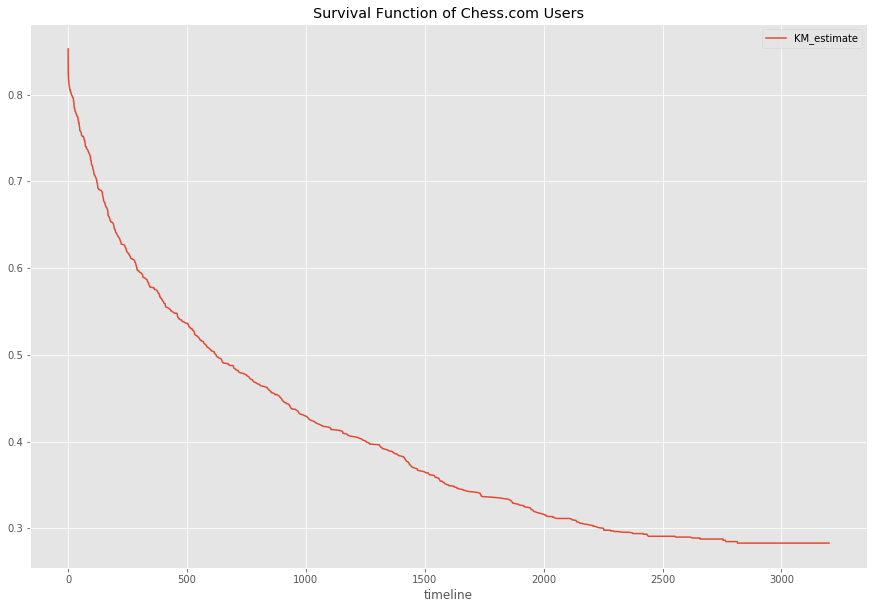

In [10]:
kmf.survival_function_.plot(figsize=(15, 10))
plt.title('Survival Function of Chess.com Users')

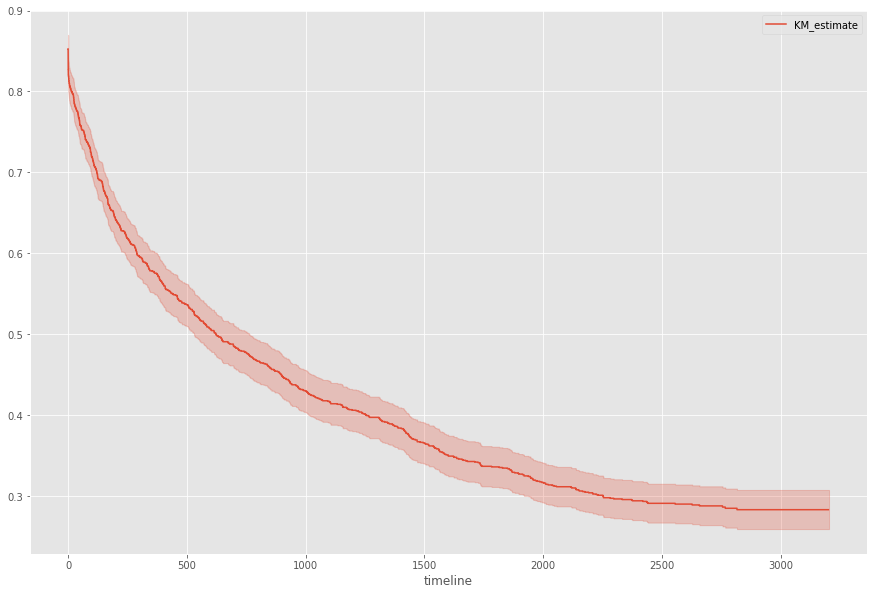

In [11]:
kmf.plot(figsize=(15, 10));

In [12]:
kmf.median_

622.44